In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import urllib
import glob
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
url = 'https://raw.githubusercontent.com/lavsz/dsc-mod-2-project-v2-1-onl01-dtsc-pt-052620/master/kc_house_data.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
#King's County shapefile
link = 'https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.zip'
urllib.request.urlretrieve(link, 'file.gz')

('file.gz', <http.client.HTTPMessage at 0x1207a1a20>)

In [6]:
# Importing District Data
zip_obj = zipfile.ZipFile('file.gz', 'r')
zip_obj.extractall()
district = gpd.GeoDataFrame.from_file(glob.glob("*.shp")[0])
district.crs

{'init': 'epsg:4326'}

<Figure size 1440x1440 with 0 Axes>

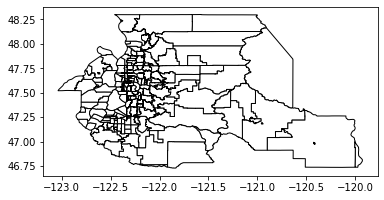

In [7]:
plt.figure(figsize=(20,20))
district.plot(color='white', edgecolor = 'black')

In [8]:
district.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,Shape_Leng,Shape_Area,geometry
0,1,98031,98031,033,Standard,117508.232813,2.280129e+08,"POLYGON ((-122.21842 47.43750, -122.21935 47.4..."
1,2,98032,98032,033,Standard,166737.665152,4.826754e+08,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411..."
2,3,98030,98030,033,Standard,94409.538568,2.000954e+08,"POLYGON ((-122.21006 47.38692, -122.21007 47.3..."
3,4,98029,98029,033,Standard,111093.715481,2.774247e+08,"POLYGON ((-121.97642 47.58430, -121.97645 47.5..."
4,5,98028,98028,033,Standard,71488.230747,1.996531e+08,"POLYGON ((-122.22788 47.76909, -122.22790 47.7..."


In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [31]:
df.id.nunique(), len(df)

(21420, 21597)

In [10]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [11]:
water_zip = [98177, 98117, 98199, 98119, 98121, 
             98101, 98104, 98134, 98126, 98116, 
             98136, 98136, 98166, 98196, 98070]

In [12]:
df['waterfront_adj'] = df['waterfront']
for i in range(len(df)):
    if np.isnan(df['waterfront_adj'][i]) == 1:
        if df.zipcode[i] in water_zip:
            df['waterfront_adj'][i] = 1
        elif df.zipcode[i] not in water_zip:
            df['waterfront_adj'][i] = 0
        else:
            df['waterfront_adj'][i] = df.waterfront[i]
        

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

(47.1, 47.8)

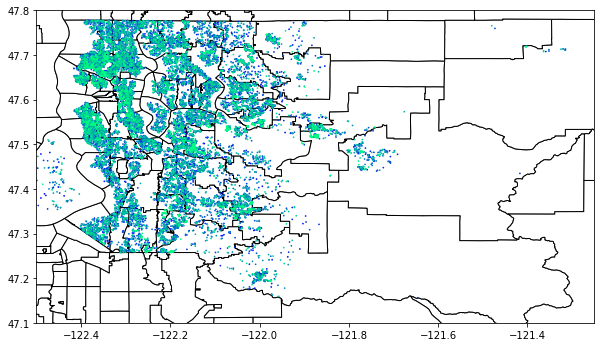

In [14]:
ax = plt.figure(figsize=(10, 15)).add_subplot(111)

set1 = district.plot(color='white', ax=ax, edgecolor='black', legend=True)
set2 = geo_df.plot(c=geo_df.price, cmap='winter', ax=ax, markersize=0.5)
set1.set_xlim(-122.5, -121.25)
set1.set_ylim(47.1, 47.8)

In [15]:
# Reduce the county district map to only places with houses from the df
district_new = district[district.ZIP.isin(df.zipcode.unique())]

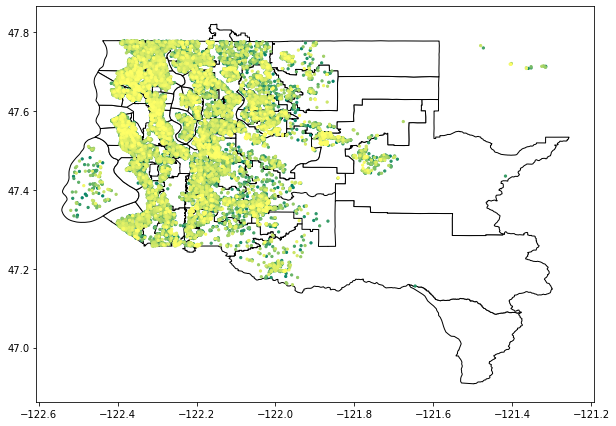

In [16]:
ax = plt.figure(figsize=(10, 15)).add_subplot(111)

set1 = district_new.plot(color='white', ax=ax, edgecolor='black', legend=True)
set2 = geo_df.plot(c=geo_df.price, cmap='summer', ax=ax, markersize=5)

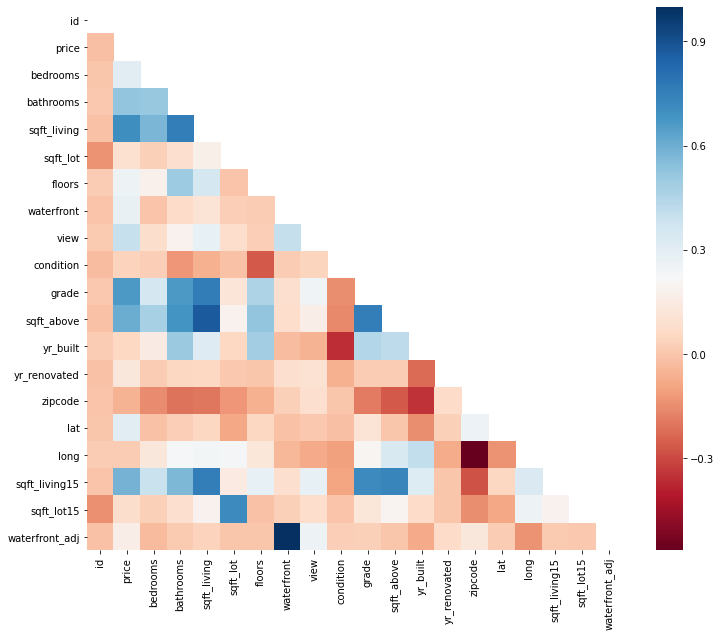

In [30]:
# Corr
plt.figure(figsize=(12,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='RdBu')
